In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import signals
df_daily_spy = pd.read_csv("./algo_data/spy_daily_prices.csv")
df_daily_spy['date'] = pd.to_datetime(df_daily_spy['date'])
# Load the data
df=pd.read_csv("./algo_data/vol_surfaces2.csv")
#df['minute'] = pd.to_datetime(df['minute'])
#df['date'] = pd.to_datetime(df['date'])
#df['minute'].apply(lambda x: x.tz).unique()
#for each row find 16:17:00 and compute years to maturity where maturity is 16:17:00 for each row
#df.loc[df['implied_spot'] <= .07, ['implied_spot', 'atm_vol', 'slope', 'quadratic_term', 'scaled_slope', 'scaled_quadratic']] = np.nan
#df.loc[df['atm_vol'] <= .03, ['implied_spot', 'atm_vol', 'slope', 'quadratic_term', 'scaled_slope', 'scaled_quadratic']] = np.nan
# Forward fill the NaN values
#df=df.ffill().infer_objects(copy=False)
df=signals.preprocess_df(df)
""""
def get_years_to_maturity(row):
    maturity = pd.Timestamp(row['minute'].date(), tz=row['minute'].tz) + pd.Timedelta(hours=16, minutes=17)
    return (maturity - row['minute']).seconds / (365.25 * 24 * 60 * 60)

df['years_to_maturity'] = df.apply(get_years_to_maturity, axis=1)
"""
is_sorted = df['minute'].is_monotonic_increasing
print("DataFrame is sorted by 'minute':", is_sorted)



/Users/stirlitz/ncGitHub/daily_options/daily_options1/signals.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['minute'] = pd.to_datetime(df['minute'])


DataFrame is sorted by 'minute': True


In [2]:
test_num_rows=1000
df_whole=df
df = df.head(test_num_rows).copy()
df=df_whole
#label start of day rows, rows which have a differet date from the previous row
df['start_of_day'] = df['minute'].diff().dt.days.fillna(0).astype(bool)
df["return"] = df["implied_spot"].apply(np.log).diff()
df

,minute,implied_spot,atm_vol,slope,quadratic_term,scaled_slope,scaled_quadratic,open_price,high_price,low_price,...,vwap,timestamp,transactions,otc,timestamp_utc,timestamp_est,date,years_to_maturity,start_of_day,return
0,2024-01-02 09:31:00-05:00,472.563933,0.189797,-0.386711,133.447533,-0.001074,0.103011,472.160,472.67,472.050,...,472.9271,1704205800000,11700,NaN,2024-01-02 14:30:00+00:00,2024-01-02 09:30:00-05:00,2024-01-02,0.000772,False,NaN
1,2024-01-02 09:32:00-05:00,472.705855,0.183684,-0.393608,156.933023,-0.001092,0.120842,472.530,472.70,472.365,...,473.3993,1704205860000,3810,NaN,2024-01-02 14:31:00+00:00,2024-01-02 09:31:00-05:00,2024-01-02,0.000770,False,0.000300
2,2024-01-02 09:33:00-05:00,472.784149,0.181348,-0.452450,182.755226,-0.001254,0.140378,472.680,472.80,472.650,...,473.6179,1704205920000,3807,NaN,2024-01-02 14:32:00+00:00,2024-01-02 09:32:00-05:00,2024-01-02,0.000768,False,0.000166
3,2024-01-02 09:34:00-05:00,472.743159,0.180591,-0.333196,179.169754,-0.000922,0.137283,472.760,472.77,472.480,...,472.6133,1704205980000,3280,NaN,2024-01-02 14:33:00+00:00,2024-01-02 09:33:00-05:00,2024-01-02,0.000766,False,-0.000087
4,2024-01-02 09:35:00-05:00,472.689797,0.178740,-0.421782,178.336217,-0.001166,0.136305,472.685,472.78,472.550,...,472.6734,1704206040000,2284,NaN,2024-01-02 14:34:00+00:00,2024-01-02 09:34:00-05:00,2024-01-02,0.000764,False,-0.000113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112994,2025-03-03 15:57:00-05:00,583.217755,0.433006,-0.643380,2250.084372,-0.000397,0.085561,583.120,583.38,583.080,...,583.2175,1741035360000,5290,NaN,2025-03-03 20:56:00+00:00,2025-03-03 15:56:00-05:00,2025-03-03,0.000038,False,0.000160
112995,2025-03-03 15:58:00-05:00,583.318760,0.399562,-1.119237,2824.657505,-0.000673,0.102039,583.220,583.42,582.800,...,583.1694,1741035420000,6733,NaN,2025-03-03 20:57:00+00:00,2025-03-03 15:57:00-05:00,2025-03-03,0.000036,False,0.000173
112996,2025-03-03 15:59:00-05:00,583.589449,0.375949,-6.439821,3647.324778,-0.003767,0.124823,583.320,583.61,583.115,...,584.9927,1741035480000,6584,NaN,2025-03-03 20:58:00+00:00,2025-03-03 15:58:00-05:00,2025-03-03,0.000034,False,0.000464
112997,2025-03-03 16:00:00-05:00,584.010249,0.336107,0.051465,3648.685396,0.000029,0.117932,583.570,584.11,583.200,...,585.3033,1741035540000,12913,NaN,2025-03-03 20:59:00+00:00,2025-03-03 15:59:00-05:00,2025-03-03,0.000032,False,0.000721


In [244]:
#
df.rolling(window=60, on='minute').apply(lambda x: np.sqrt(np.sum(x['return']**2 * (1 - x['start_of_day']))

SyntaxError: incomplete input (2704865628.py, line 2)

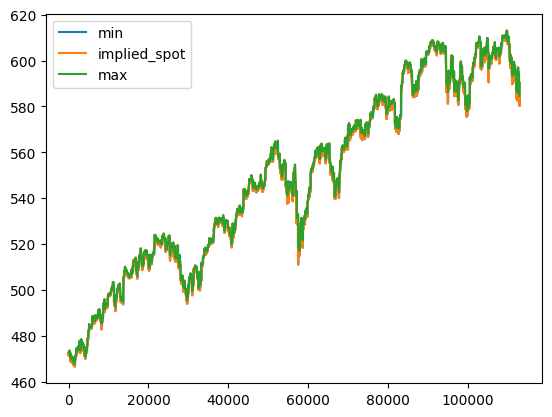

In [2]:
"""
def calculate_realized_vol_series(df,window_size):
    from copy import deepcopy
    df_returns = deepcopy(df[["minute", "return", "start_of_day"]])
    df_returns["return_intraday"]=df_returns["return"]*(1-df_returns["start_of_day"])
    #df_returns.loc[2, "start_of_day"] = true
    #df_returns["return"] = df_returns.apply(lambda x: np.nan if x["start_of_day"] else x["return"], axis=1)
    #df_returns['vol'] = df_returns["return"].rolling(window=window_size).apply(lambda x: np.sqrt(np.nansum(x**2) / window_size), raw=true)
    df_returns['vol'] = df_returns["return_intraday"].rolling(window=window_size).apply(lambda x: np.sqrt(np.nansum(x**2) / window_size), raw=true)
    return df_returns["vol"]

df["hvol_60"] = calculate_realized_vol_series(df, 60)*np.sqrt(252*24*60)


#df["low_price_60"] = df["implied_spot"].rolling(window=60).apply(lambda x: np.nanmin(x), raw=true)
df["min_price_60"] = df["implied_spot"].rolling(window=60).min()
df["max_price_60"] = df["implied_spot"].rolling(window=60).max()
df["min_atm_vol_60"] = df["atm_vol"].rolling(window=60).min()
df["max_atm_vol_60"] = df["atm_vol"].rolling(window=60).max()
df["mean_price_60"] = df["implied_spot"].rolling(window=60).mean()
df["mean_price_10"] = df["implied_spot"].rolling(window=10).mean()
"""
df=signals.compute_signals(df)
ax=df["min_price_60"].plot()
#ax=df["hvol_60"].plot()
df["implied_spot"].plot(ax=ax)
df["max_price_60"].plot(ax=ax)
ax.legend(["min", "implied_spot", "max"])
#df["implied_spot"].plot(ax=ax, secondary_y=true)


In [3]:
a=True

<Axes: xlabel='minute'>

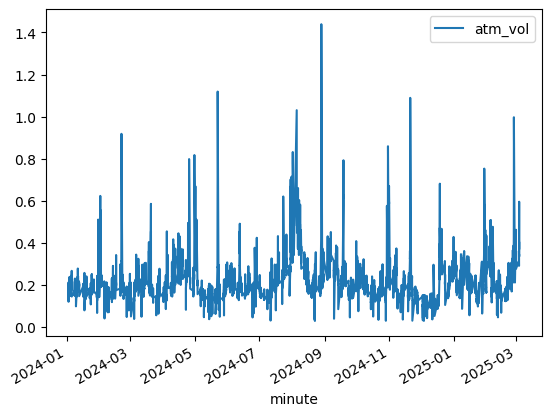

In [3]:
df.plot(x='minute', y='atm_vol')

<Axes: >

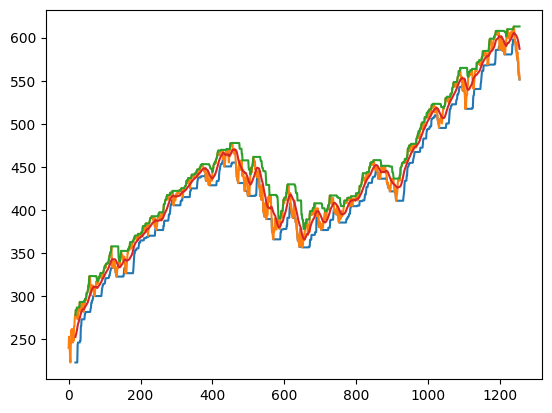

In [4]:
#df_daily_spy["hvol_20"] = df_daily_spy["close"].pct_change().rolling(window=20).std()*np.sqrt(252)
#df_daily_spy["min_price_20"] = df_daily_spy["close"].rolling(window=20).min()
#df_daily_spy["max_price_20"] = df_daily_spy["close"].rolling(window=20).max()
#df_daily_spy["mean_price_20"] = df_daily_spy["close"].rolling(window=20).mean()
df_daily_spy=signals.compute_underlying_signals(df_daily_spy)
ax=df_daily_spy["min_price_20"].plot()
df_daily_spy["close"].plot(ax=ax)
df_daily_spy["max_price_20"].plot(ax=ax)
df_daily_spy["mean_price_20"].plot(ax=ax)


In [12]:
df_daily_spy[["date","under_hvol_20"]].head(50)

KeyError: "['under_hvol_20'] not in index"

In [11]:
ax = df_daily_spy.plot(x='date', y='under_hvol_20')


KeyError: 'under_hvol_20'

<Axes: >

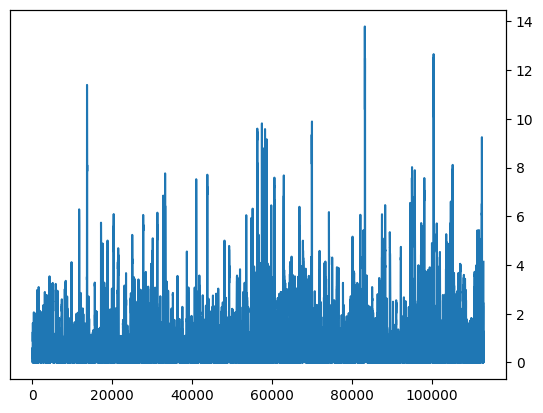

In [5]:
(df["implied_spot"]-df["min_price_60"]).plot(secondary_y=True)

In [7]:
#df=pd.merge(df, df_daily_spy, on='date', how='left')

df=signals.merge_underlying(df, df_daily_spy)
"""
df_daily_spy["close_shifted"] = df_daily_spy["close"].shift(1)
dict_rename={
    "close":"under_close",
    "open":"under_open",
    "close_shifted":"under_close_shifted",
    "hvol_20":"under_hvol_20",
    "min_price_20":"under_min_price_20",
    "max_price_20":"under_max_price_20",
    "mean_price_20":"under_mean_price_20",
    }
df_daily_spy.rename(columns=dict_rename, inplace=True)
#df_daily_spy.rename(columns={'close': 'under_close', 'open': 'under_open',"close_shifted":"under_close_shifted"}, inplace=True)
df = pd.merge(df, df_daily_spy[["date","under_close_shifted","under_open","under_hvol_20","under_min_price_20","under_max_price_20","under_mean_price_20"]], on='date', how='left')
"""

KeyError: 'close'

In [8]:
df

,minute,implied_spot,atm_vol,slope,quadratic_term,scaled_slope,scaled_quadratic,open_price,high_price,low_price,...,min_atm_vol_60,max_atm_vol_60,mean_price_60,mean_price_10,under_close_shifted,under_open,under_hvol_20,under_min_price_20,under_max_price_20,under_mean_price_20
0,2024-01-02 09:31:00-05:00,472.563933,0.189797,-0.386711,133.447533,-0.001074,0.103011,472.160,472.67,472.050,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
1,2024-01-02 09:32:00-05:00,472.705855,0.183684,-0.393608,156.933023,-0.001092,0.120842,472.530,472.70,472.365,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
2,2024-01-02 09:33:00-05:00,472.784149,0.181348,-0.452450,182.755226,-0.001254,0.140378,472.680,472.80,472.650,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
3,2024-01-02 09:34:00-05:00,472.743159,0.180591,-0.333196,179.169754,-0.000922,0.137283,472.760,472.77,472.480,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
4,2024-01-02 09:35:00-05:00,472.689797,0.178740,-0.421782,178.336217,-0.001166,0.136305,472.685,472.78,472.550,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112994,2025-03-03 15:57:00-05:00,583.217755,0.433006,-0.643380,2250.084372,-0.000397,0.085561,583.120,583.38,583.080,...,0.433006,0.596077,582.549553,582.250849,594.18,596.18,0.141147,583.77,612.93,601.377
112995,2025-03-03 15:58:00-05:00,583.318760,0.399562,-1.119237,2824.657505,-0.000673,0.102039,583.220,583.42,582.800,...,0.399562,0.596077,582.492983,582.422558,594.18,596.18,0.141147,583.77,612.93,601.377
112996,2025-03-03 15:59:00-05:00,583.589449,0.375949,-6.439821,3647.324778,-0.003767,0.124823,583.320,583.61,583.115,...,0.375949,0.596077,582.445986,582.574177,594.18,596.18,0.141147,583.77,612.93,601.377
112997,2025-03-03 16:00:00-05:00,584.010249,0.336107,0.051465,3648.685396,0.000029,0.117932,583.570,584.11,583.200,...,0.336107,0.596077,582.411564,582.783626,594.18,596.18,0.141147,583.77,612.93,601.377
